In [396]:
import pandas as pd
import numpy as np
industries = pd.read_csv('30_Industry_Portfolios.csv',skiprows = 11,index_col= 0)[534:1134].astype('float')
mkt = pd.read_csv('F-F_Research_Data_Factors.csv',skiprows = 3,index_col= 0)[534:1134].astype('float')

industries.index = pd.to_datetime(industries.index,format= '%Y%m')
mkt.index = pd.to_datetime(mkt.index,format= '%Y%m')

In [397]:
rm = mkt['Mkt-RF']
rf = mkt['RF']

In [398]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
beta = {}
alpha = {}
for industry in industries.columns:
    y = industries[industry] - rf
    x = sm.add_constant(rm)
    res = sm.OLS(y,x).fit()
    beta[industry] = res.params['Mkt-RF']
    alpha[industry] = res.params['const']
beta_series = pd.Series(beta).sort_values(ascending=False)
beta_series

Steel    1.326480
Games    1.289714
BusEq    1.276864
Servs    1.264146
ElcEq    1.228497
Autos    1.226780
FabPr    1.223022
Coal     1.202830
Cnstr    1.197726
Txtls    1.164192
Carry    1.131003
Clths    1.095969
Books    1.076666
Chems    1.068877
Fin      1.064318
Other    1.055001
Trans    1.047405
Whlsl    1.024655
Meals    1.009074
Rtail    0.992354
Mines    0.948131
Paper    0.936142
Oil      0.879818
Hlth     0.815883
Telcm    0.795515
Hshld    0.782163
Beer     0.737711
Food     0.687529
Smoke    0.659917
Util     0.492141
dtype: float64

In [404]:
beta_series[:5].index.append(beta_series[-5:].index)
beta_series[-5:].index

Index(['Hshld', 'Beer ', 'Food ', 'Smoke', 'Util '], dtype='object')

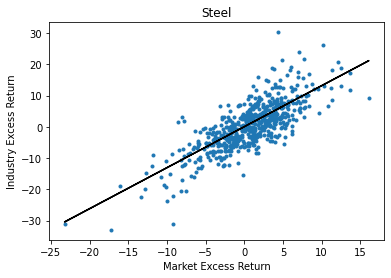

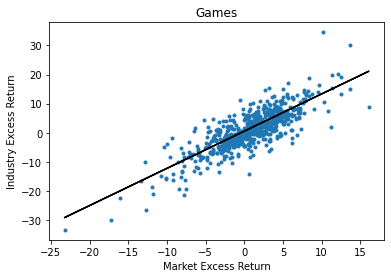

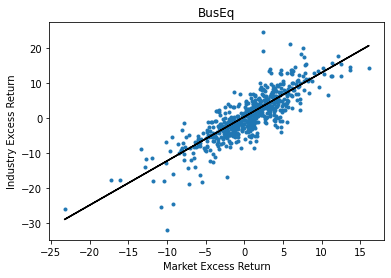

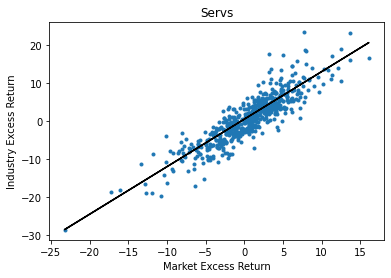

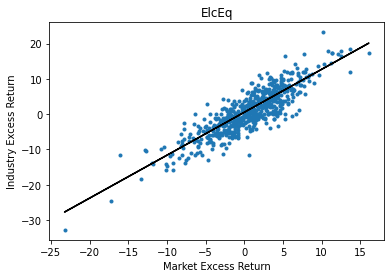

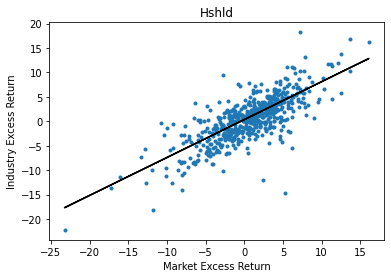

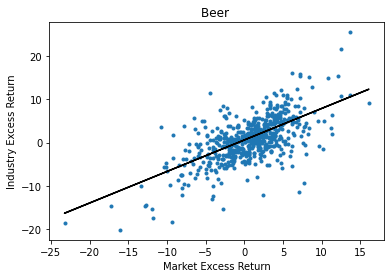

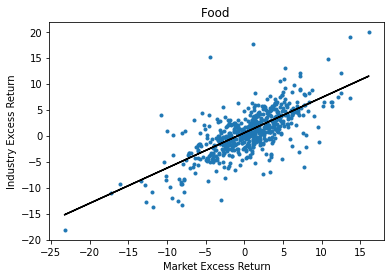

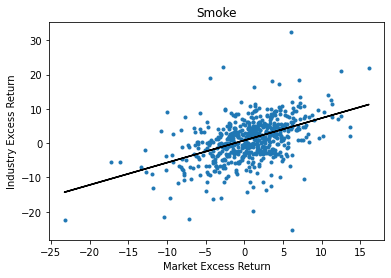

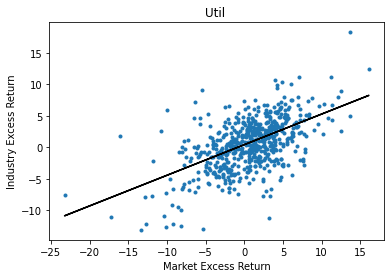

In [403]:
for industry in beta_series[:5].index.append(beta_series[-5:].index):
    fig = plt.figure()
    plt.xlabel("Market Excess Return")
    plt.ylabel("Industry Excess Return")
    y = industries[industry] - rf
    x = sm.add_constant(rm - rf)
    res = sm.OLS(y,x).fit()
    plt.plot(rm,y,'.')
    plt.plot(rm,rm*res.params.iloc[1] + res.params.iloc[0], color = 'black')
    plt.title(industry)
    plt.show()

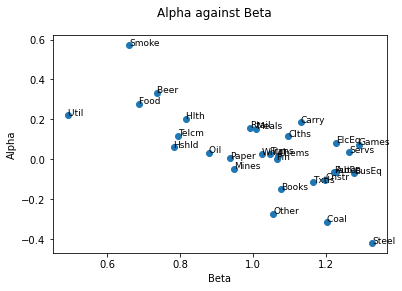

In [118]:
fig = plt.figure()
fig.suptitle("Alpha against Beta")
plt.xlabel("Beta")
plt.ylabel("Alpha")
plt.scatter(pd.Series(beta),pd.Series(alpha))
for industry in industries.columns:
    plt.annotate(industry,(beta[industry],alpha[industry]),fontsize = 9)

Alpha and Beta seems to be negatively correlated: industries with higher beta seems to have smaller and negative alpha

(c)

In [121]:
start = pd.to_datetime('198101',format = '%Y%m')
end = pd.to_datetime('202012',format = '%Y%m')
months = industries.index[industries.index>=start]
for month in months:
    x = rm.iloc[idx - 60:idx]
    y = industries[idx - 60 :idx]
    beta = {}
    alpha = {}
    for industry in industries.columns:
        y = y[industry] - rf
        x = sm.add_constant(x)
        res = sm.OLS(y,x).fit()
        beta[industry] = res.params['Mkt-RF']
        alpha[industry] = res.params['const']


In [167]:
cyclical_return = {}
defensive_return = {}
for idx in range(120,600):
    rm_window = rm.iloc[idx - 60:idx]
    rf_window = rf.iloc[idx - 60:idx]
    industries_window = industries[idx - 60 :idx]
    beta = {}
    alpha = {}
    
    for industry in industries.columns:
        y = industries_window[industry] - rf_window
        x = sm.add_constant(rm_window)
        res = sm.OLS(y,x).fit()
        beta[industry] = res.params['Mkt-RF']
        alpha[industry] = res.params['const']
    beta_series = pd.Series(beta).sort_values(ascending=False)
    cyclical_list = beta_series.index[:5]
    defensive_list = beta_series.index[-5:]

    cyclical_return[industries.iloc[idx:idx+1].index[0]] = industries.iloc[idx][cyclical_list].mean()
    defensive_return[industries.iloc[idx:idx+1].index[0]] = industries.iloc[idx][defensive_list].mean()

cyclical_return = pd.Series(cyclical_return)
defensive_return = pd.Series(defensive_return)

cyclical_excess = cyclical_return - rf[-480:]

defensive_excess = defensive_return - rf[-480:]


In [407]:
rm

1971-01-01     4.84
1971-02-01     1.41
1971-03-01     4.13
1971-04-01     3.15
1971-05-01    -3.98
              ...  
2020-08-01     7.63
2020-09-01    -3.63
2020-10-01    -2.10
2020-11-01    12.47
2020-12-01     4.63
Name: Mkt-RF, Length: 600, dtype: float64

average excess return for defensive index: 0.7690
average excess return for cyclical index: 0.7283
SR for defensive index: 0.6867
SR for cyclical index: 0.3893
IR for defensive index: 0.0449
IR for cyclical index: 0.0803
beta for defensive index: 0.6040
beta for cyclical index: 1.3687
alpha for defensive index: 0.3123
alpha for cyclical index: -0.1736
Max drawdown for defensive index: 0.3579
Max drawdown for cyclical index: 0.6424


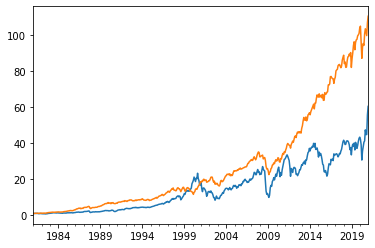

In [412]:
SR_c = (cyclical_excess).mean() * 12 /(cyclical_excess.std() * 12**0.5)
SR_d = (defensive_excess).mean() * 12 /(defensive_excess.std() * 12**0.5)

regression_c = sm.OLS(cyclical_excess,sm.add_constant(rm[-480:])).fit()
regression_d = sm.OLS(defensive_excess,sm.add_constant(rm[-480:])).fit()

def mdd(ts:pd.Series):
    return ((ts.cummax() - ts)/ts.cummax()).max()

def IR(track, bm):
    return (track-bm).mean()*12 / ((track-bm).std()*12**0.5)

IR_c = IR(cyclical_excess, rm[-480:])
IR_d = IR(defensive_excess, rm[-480:])
defensive_value = (defensive_return/100 + 1).cumprod()
cyclical_value = (cyclical_return/100 + 1).cumprod()

print("average excess return for defensive index: %.4f" %cyclical_excess.mean())
print("average excess return for cyclical index: %.4f" %defensive_excess.mean())

print("SR for defensive index: %.4f" %SR_d)
print("SR for cyclical index: %.4f" %SR_c)


print("IR for defensive index: %.4f" %IR_d)
print("IR for cyclical index: %.4f" %IR_c)


print("beta for defensive index: %.4f" %regression_d.params['Mkt-RF'])
print("beta for cyclical index: %.4f" %regression_c.params['Mkt-RF'])

print("alpha for defensive index: %.4f" %regression_d.params['const'])
print("alpha for cyclical index: %.4f" %regression_c.params['const'])

print("Max drawdown for defensive index: %.4f" %mdd(defensive_value))
print("Max drawdown for cyclical index: %.4f" %mdd(cyclical_value))

cyclical_value.plot()
defensive_value.plot()
plt.show()

Findings: defensive portfolio outperforms cyclical portfolio significantly in SR, alpha, and max drawdown

## (d)
Using the better-performing Bayesian method with alpha = 10 (which result in more “sensible” and narrower-ranging weights), and regard cyclical index as “market index” and defensive index as “risk-free investment” in the original setup

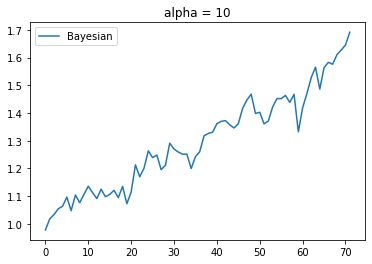

In [383]:
α = 10
σ = 5.4
m0 = 0.6505904761904748
v0 = 5.428976349895644

m = m0
v = v0

r_cyclical = rf[rf.index == pd.to_datetime(201312,format = '%Y%m')]
portfolio_value = [1]

T = 0

for idx in range(72):
    T += 1
    ω1 = 100 * m/(α*(v**2+σ**2))
    cyclical_predicted_excess = rm_predict.iloc[idx]*regression_c.params['Mkt-RF'] + regression_c.params['const']
    portfolio_value.append((1 + ω1*cyclical_return[33*12+idx]/100 + (1-ω1)*defensive_return[33*12+idx]/100)*portfolio_value[-1])         


    r_bar = np.mean(cyclical_return.iloc[33*12-1:33*12+idx])

    m = (m0*(σ**2) + r_bar*T*(v0**2))/(σ**2+T*v0**2)
    v = np.sqrt((v0*σ)**2/(σ**2 + T*v0**2))


plt.plot(portfolio_value[1:],label = 'Bayesian')
plt.legend()

plt.title('alpha = ' + str(α))
plt.show()